### Facebook Prophet model for Time Series

In [ ]:
# !pip install pystan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 KB 7.6 MB/s eta 0:00:00


In [ ]:
# !python -m pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# !pip install fbprophet  # test

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
Failed to build fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.1.0
    Uninstalling cmdstanpy-1.1.0:
      Successfully uninstalled cmdstanpy-1.1.0
  error: subprocess-exited-with-error
  
  × Running setup.py install for fbprophet did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Running setup.py install 

In [ ]:
import prophet

In [ ]:
dir(prophet)

['Path',
 'Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'about',
 'diagnostics',
 'f',
 'forecaster',
 'hdays',
 'here',
 'make_holidays',
 'models',
 'plot']

In [ ]:
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving covid_19_clean_complete.csv to covid_19_clean_complete.csv


In [ ]:
df = pd.read_csv('/content/covid_19_clean_complete.csv',parse_dates=['Date'])
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [ ]:
# we already converted datatype of 'Month' with parse_dates parameter .
# 2nd way of doing that is -
# df['Month'] = pd.to_datetime(df['Month'])

In [ ]:
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [ ]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [ ]:
# unique dates - 
df.Date.nunique()

188

In [ ]:
# grouping data countrywise-
total = df.groupby(['Date'])['Confirmed','Deaths','Recovered','Active'].sum().reset_index()
total.head()

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


### More EDA(unrelated)

In [ ]:
# grouping all data by date -
totalD = df.groupby(['Country/Region'])['Confirmed','Deaths','Recovered','Active'].resample('D').sum()
totalD.head(500)

Confirmed  Deaths  Recovered  Active
Country/Region Date                                            
Afghanistan    2020-01-22          0       0          0       0
               2020-01-23          0       0          0       0
               2020-01-24          0       0          0       0
               2020-01-25          0       0          0       0
               2020-01-26          0       0          0       0
...                              ...     ...        ...     ...
Algeria        2020-05-20       7542     568       3968    3006
               2020-05-21       7728     575       4062    3091
               2020-05-22       7918     582       4256    3080
               2020-05-23       8113     592       4426    3095
               2020-05-24       8306     600       4784    2922

[500 rows x 4 columns]

In [ ]:
con = df.groupby(['Country/Region'])['Confirmed','Deaths','Recovered','Active'].sum().reset_index()
con.head()

,Country/Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,1936390,49098,798240,1089052
1,Albania,196702,5708,118877,72117
2,Algeria,1179755,77972,755897,345886
3,Andorra,94404,5423,69074,19907
4,Angola,22662,1078,6573,15011


In [ ]:
#Monthly covid data for each country-

In [ ]:
# for this we have to make our date col as index-
df = df.set_index('Date')
df

,Province/State,Country/Region,Lat,Long,Confirmed,Deaths,Recovered,Active,WHO Region
Date,,,,,,,,,
2020-01-22,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,Eastern Mediterranean
2020-01-22,NaN,Albania,41.153300,20.168300,0,0,0,0,Europe
2020-01-22,NaN,Algeria,28.033900,1.659600,0,0,0,0,Africa
2020-01-22,NaN,Andorra,42.506300,1.521800,0,0,0,0,Europe
2020-01-22,NaN,Angola,-11.202700,17.873900,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...
2020-07-27,NaN,Sao Tome and Principe,0.186400,6.613100,865,14,734,117,Africa
2020-07-27,NaN,Yemen,15.552727,48.516388,1691,483,833,375,Eastern Mediterranean
2020-07-27,NaN,Comoros,-11.645500,43.333300,354,7,328,19,Africa


    W: weekly frequency
    M: month end frequency
    SM: semi-month end frequency (15th and end of the month)
    Q: quarter end frequency
    H : Hourly
    D : Per Day

In [ ]:
cond = df.groupby(['Country/Region'])['Confirmed','Deaths','Recovered','Active'].resample("M").sum()
cond.head(100)

Confirmed  Deaths  Recovered   Active
Country/Region Date                                             
Afghanistan    2020-01-31          0       0          0        0
               2020-02-29          6       0          0        6
               2020-03-31       1219      29         26     1164
               2020-04-30      27237     860       2927    23450
               2020-05-31     225655    4994      24129   196532
...                              ...     ...        ...      ...
Bangladesh     2020-05-31     731311   10746     139045   581520
               2020-06-30    2836656   37194     943347  1856115
               2020-07-31    5115933   65491    2630120  2420322
Barbados       2020-01-31          0       0          0        0
               2020-02-29          0       0          0        0

[100 rows x 4 columns]

In [ ]:
congroup = df.groupby('Country/Region').sum()
congroup

,Lat,Long,Confirmed,Deaths,Recovered,Active
Country/Region,,,,,,
Afghanistan,6380.552680,12729.471164,1936390,49098,798240,1089052
Albania,7736.820400,3791.640400,196702,5708,118877,72117
Algeria,5270.373200,312.004800,1179755,77972,755897,345886
Andorra,7991.184400,286.098400,94404,5423,69074,19907
Angola,-2106.107600,3360.293200,22662,1078,6573,15011
...,...,...,...,...,...,...
West Bank and Gaza,6007.013600,6623.841600,233461,1370,61124,170967
Western Sahara,4552.514000,-2422.530400,901,63,648,190
Yemen,2923.912676,9121.080944,67180,17707,23779,25694


In [ ]:
df.reset_index(inplace = True)
df.head()

,index,Date,Province/State,Country/Region,Lat,Long,Confirmed,Deaths,Recovered,Active,WHO Region
0,0,2020-01-22,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,Eastern Mediterranean
1,1,2020-01-22,NaN,Albania,41.15330,20.168300,0,0,0,0,Europe
2,2,2020-01-22,NaN,Algeria,28.03390,1.659600,0,0,0,0,Africa
3,3,2020-01-22,NaN,Andorra,42.50630,1.521800,0,0,0,0,Europe
4,4,2020-01-22,NaN,Angola,-11.20270,17.873900,0,0,0,0,Africa


In [ ]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


### Facebook Prophet model - 

In [ ]:
# No preproessing of data required 
# No Manual checking for Stationary/Non Stationary data
# No Manual parameter checking required

In [ ]:
# making date as ds and confirmed as y to predict confirmed , we will do this for all
# dependent variables one by one.
df_prophet = total.rename(columns={'Date':'ds','Confirmed':'y'})
df_prophet

,ds,y,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010
...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006
184,2020-07-24,15791645,639650,8939705,6212290
185,2020-07-25,16047190,644517,9158743,6243930
186,2020-07-26,16251796,648621,9293464,6309711


In [ ]:
from prophet import Prophet
m = Prophet()

In [ ]:
model = m.fit(df_prophet)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpahjm5ba1/_mxc1vrh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpahjm5ba1/k9it2csl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15370', 'data', 'file=/tmp/tmpahjm5ba1/_mxc1vrh.json', 'init=/tmp/tmpahjm5ba1/k9it2csl.json', 'output', 'file=/tmp/tmpahjm5ba1/prophet_modellx2fxo13/prophet_model-20230329100806.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:08:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:08:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
model.seasonalities

OrderedDict([('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [ ]:
# forecast data date wise-
len(df_prophet)

188

In [ ]:
# for next 100 days-
future_pred = model.make_future_dataframe(periods=100,freq='D')
future_pred

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
283,2020-10-31
284,2020-11-01
285,2020-11-02
286,2020-11-03


In [ ]:
future_pred.tail()

,ds
283,2020-10-31
284,2020-11-01
285,2020-11-02
286,2020-11-03
287,2020-11-04


#### Prediction-

In [ ]:
pred = model.predict(future_pred)
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-1.062204e+04,-1.262300e+05,8.001964e+04,-1.062204e+04,-1.062204e+04,-11022.919838,-11022.919838,-11022.919838,-11022.919838,-11022.919838,-11022.919838,0.0,0.0,0.0,-2.164495e+04
1,2020-01-23,-7.870816e+03,-1.203380e+05,9.731773e+04,-7.870816e+03,-7.870816e+03,-1082.195992,-1082.195992,-1082.195992,-1082.195992,-1082.195992,-1082.195992,0.0,0.0,0.0,-8.953012e+03
2,2020-01-24,-5.119598e+03,-9.636496e+04,1.114754e+05,-5.119598e+03,-5.119598e+03,10096.194723,10096.194723,10096.194723,10096.194723,10096.194723,10096.194723,0.0,0.0,0.0,4.976597e+03
3,2020-01-25,-2.368379e+03,-9.426545e+04,1.139437e+05,-2.368379e+03,-2.368379e+03,13721.169479,13721.169479,13721.169479,13721.169479,13721.169479,13721.169479,0.0,0.0,0.0,1.135279e+04
4,2020-01-26,3.828396e+02,-1.057621e+05,1.106837e+05,3.828396e+02,3.828396e+02,7245.350392,7245.350392,7245.350392,7245.350392,7245.350392,7245.350392,0.0,0.0,0.0,7.628190e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2020-10-31,3.571618e+07,3.284700e+07,3.855886e+07,3.281612e+07,3.855043e+07,13721.169479,13721.169479,13721.169479,13721.169479,13721.169479,13721.169479,0.0,0.0,0.0,3.572990e+07
284,2020-11-01,3.592017e+07,3.300094e+07,3.873118e+07,3.299352e+07,3.878345e+07,7245.350392,7245.350392,7245.350392,7245.350392,7245.350392,7245.350392,0.0,0.0,0.0,3.592741e+07
285,2020-11-02,3.612416e+07,3.316455e+07,3.900980e+07,3.315423e+07,3.901558e+07,-2121.811953,-2121.811953,-2121.811953,-2121.811953,-2121.811953,-2121.811953,0.0,0.0,0.0,3.612204e+07
286,2020-11-03,3.632815e+07,3.327284e+07,3.926129e+07,3.331438e+07,3.926279e+07,-16835.786812,-16835.786812,-16835.786812,-16835.786812,-16835.786812,-16835.786812,0.0,0.0,0.0,3.631132e+07


In [ ]:
# pred consists of information for output: (yhat,range: (yhatlower,yhatupper))
# ,trend ,additive,multiplicative info.
# for prediction we need : yhat,yhatlower,yhatupper

In [ ]:
pred[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
283,2020-10-31,3.572990e+07,3.284700e+07,3.855886e+07
284,2020-11-01,3.592741e+07,3.300094e+07,3.873118e+07
285,2020-11-02,3.612204e+07,3.316455e+07,3.900980e+07
286,2020-11-03,3.631132e+07,3.327284e+07,3.926129e+07
287,2020-11-04,3.652112e+07,3.342156e+07,3.950419e+07


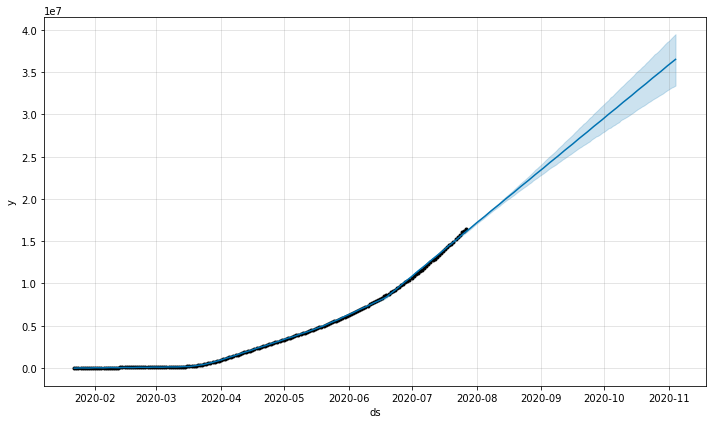

In [ ]:
#plot the model - 
model.plot(pred)
plt.show()

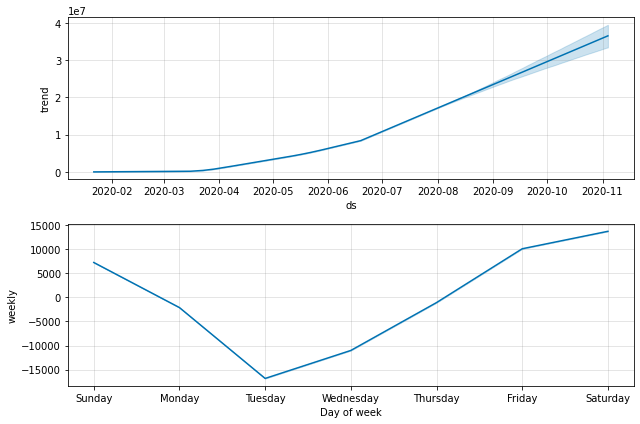

In [ ]:
model.plot_components(pred)
plt.show()

In [ ]:
from prophet.plot import add_changepoints_to_plot

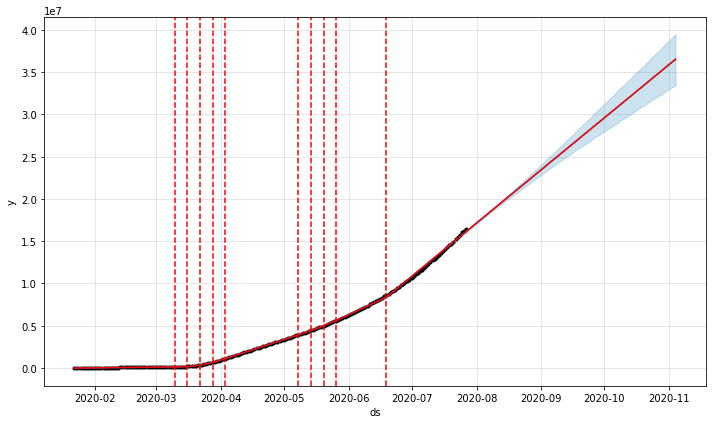

In [ ]:
# another graph-
fig = model.plot(pred)
a = add_changepoints_to_plot(fig.gca(),model,pred)
plt.show()

In [ ]:
# cross_validation-
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model,horizon='30 days',period = '15 days',initial='90 days')

INFO:prophet:Making 5 forecasts with cutoffs between 2020-04-28 00:00:00 and 2020-06-27 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpahjm5ba1/o6m93wwc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpahjm5ba1/2qubdsta.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55561', 'data', 'file=/tmp/tmpahjm5ba1/o6m93wwc.json', 'init=/tmp/tmpahjm5ba1/2qubdsta.json', 'output', 'file=/tmp/tmpahjm5ba1/prophet_model2rdfvyb3/prophet_model-20230329102629.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:26:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:26:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpahjm5ba1/ltmhm9q3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpahjm5ba1/5pdf4hmu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [ ]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-04-29,3.201065e+06,3.195811e+06,3.206263e+06,3185195,2020-04-28
1,2020-04-30,3.285434e+06,3.278888e+06,3.291634e+06,3268876,2020-04-28
2,2020-05-01,3.369641e+06,3.361526e+06,3.378003e+06,3355922,2020-04-28
3,2020-05-02,3.450903e+06,3.439901e+06,3.462325e+06,3437608,2020-04-28
4,2020-05-03,3.530367e+06,3.514214e+06,3.547794e+06,3515244,2020-04-28
...,...,...,...,...,...,...
145,2020-07-23,1.315232e+07,1.287507e+07,1.341706e+07,15510481,2020-06-27
146,2020-07-24,1.329181e+07,1.300248e+07,1.356876e+07,15791645,2020-06-27
147,2020-07-25,1.342814e+07,1.311103e+07,1.373068e+07,16047190,2020-06-27
148,2020-07-26,1.354685e+07,1.322072e+07,1.386313e+07,16251796,2020-06-27


In [ ]:
#performance_metrics-
from prophet.diagnostics import performance_metrics
df_per = performance_metrics(df_cv)
df_per

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,2.718205e+10,1.648698e+05,1.291484e+05,0.016867,0.017636,0.017049,0.000000
1,4 days,3.766143e+10,1.940655e+05,1.513276e+05,0.019327,0.022444,0.019572,0.000000
2,5 days,5.164722e+10,2.272602e+05,1.751485e+05,0.021776,0.025754,0.022095,0.066667
3,6 days,6.930725e+10,2.632627e+05,2.021212e+05,0.024553,0.026749,0.024964,0.133333
4,7 days,9.004918e+10,3.000820e+05,2.324638e+05,0.027835,0.031307,0.028360,0.200000
5,8 days,1.144819e+11,3.383517e+05,2.643133e+05,0.031145,0.034972,0.031803,0.200000
6,9 days,1.400582e+11,3.742435e+05,2.956176e+05,0.034331,0.038865,0.035134,0.200000
7,10 days,1.687604e+11,4.108046e+05,3.263360e+05,0.037373,0.043977,0.038325,0.200000
8,11 days,2.012295e+11,4.485862e+05,3.573228e+05,0.040366,0.048896,0.041469,0.200000
9,12 days,2.437795e+11,4.937403e+05,3.926095e+05,0.043543,0.052141,0.044826,0.200000


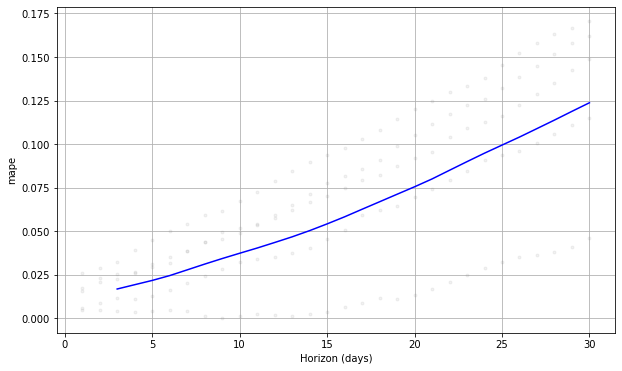

In [ ]:
from prophet.plot import plot_cross_validation_metric
df_per = plot_cross_validation_metric(df_cv,metric = 'mape')